<a href="https://colab.research.google.com/github/Jcontrerasx417/Curso-Inteligencia-Artificial/blob/main/Taller_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import files
uploaded = files.upload()  # Sube aquí tu archivo .csv

import pandas as pd

# Leer el archivo con el separador correcto
df = pd.read_csv("CLUSTER_ESTUDIANTES.csv", sep=';')

# Eliminar columna de ID si existe
if 'ID_ESTUDIANTES' in df.columns:
    df = df.drop(columns=['ID_ESTUDIANTES'])

# Limpiar puntos como separadores de miles y convertir a números
for col in df.columns:
    df[col] = df[col].astype(str).str.replace('.', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminar filas con valores faltantes
df = df.dropna()

# Revisar
print("Dimensiones finales:", df.shape)
df.head()


Saving CLUSTER_ESTUDIANTES.csv to CLUSTER_ESTUDIANTES.csv
Dimensiones finales: (8636, 17)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17
0,40900749,818182,954,0,954,0,166667,0,83333,0,0,2,1000.0,201802084,1.395098e+08,0,12
1,3202467416,909091,0,0,0,6442945483,0,0,0,25,4,0,7000.0,4103032597,1.072340e+09,222222,12
2,2495148862,10,77317,77317,0,0,10,10,0,0,0,12,7500.0,622066742,6.272848e+08,0,12
4,817714335,10,160,160,0,0,83333,83333,0,0,0,1,1200.0,678334763,2.447912e+08,0,12
5,1809828751,10,133328,0,133328,0,666667,0,583333,0,0,8,1800.0,140005777,2.407246e+09,0,12


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Evaluación de modelos
def evaluar_modelo(k_range, metodo):
    resultados = []
    for k in k_range:
        if metodo == 'kmeans':
            modelo = KMeans(n_clusters=k, random_state=0)
        elif metodo == 'kmedoids':
            modelo = KMedoids(n_clusters=k, random_state=0)
        elif metodo == 'jerarquico':
            modelo = AgglomerativeClustering(n_clusters=k)
        etiquetas = modelo.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, etiquetas)
        resultados.append((k, score))
    return resultados


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

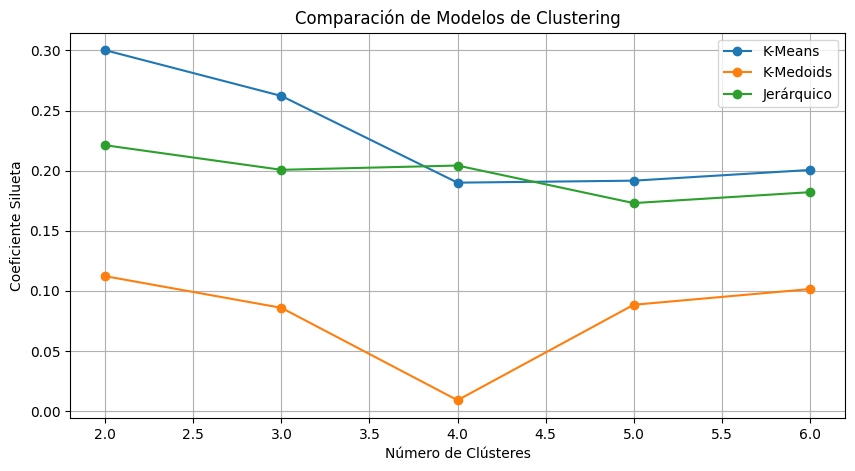

In [19]:
import matplotlib.pyplot as plt

rango_k = range(2, 7)

resultados_kmeans = evaluar_modelo(rango_k, 'kmeans')
resultados_kmedoids = evaluar_modelo(rango_k, 'kmedoids')
resultados_jerarquico = evaluar_modelo(rango_k, 'jerarquico')

def graficar_resultados(resultados, nombre):
    ks, scores = zip(*resultados)
    plt.plot(ks, scores, marker='o', label=nombre)

plt.figure(figsize=(10, 5))
graficar_resultados(resultados_kmeans, 'K-Means')
graficar_resultados(resultados_kmedoids, 'K-Medoids')
graficar_resultados(resultados_jerarquico, 'Jerárquico')
plt.xlabel("Número de Clústeres")
plt.ylabel("Coeficiente Silueta")
plt.title("Comparación de Modelos de Clustering")
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

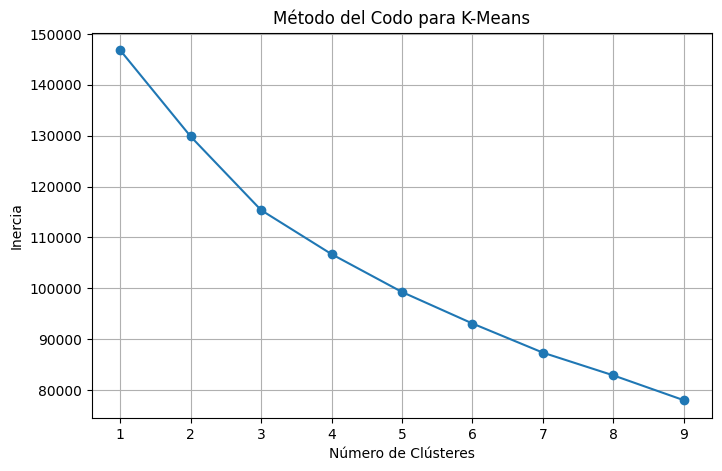

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Evaluar inercia para varios valores de k
inertia = []
K = range(1, 10)
for k in K:
    modelo = KMeans(n_clusters=k, random_state=0)
    modelo.fit(X_scaled)
    inertia.append(modelo.inertia_)

# Graficar el codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title("Método del Codo para K-Means")
plt.xlabel("Número de Clústeres")
plt.ylabel("Inercia")
plt.grid()
plt.xticks(K)
plt.show()


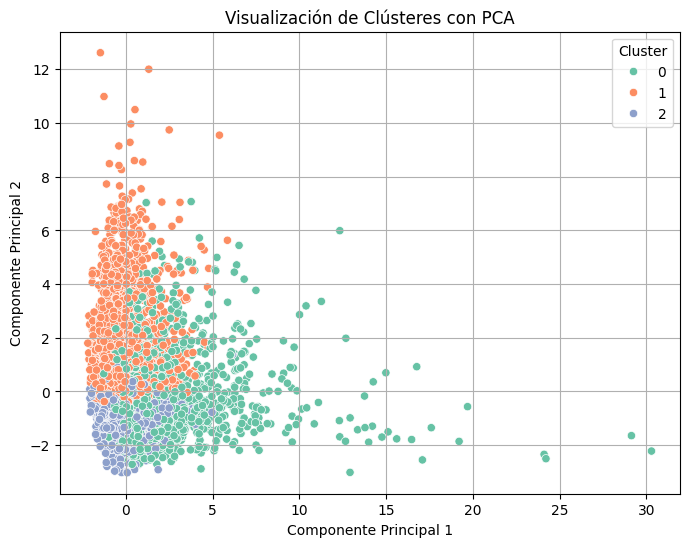

In [20]:
# Aplicar el mejor modelo (ajustar k si otro fue mejor)
modelo_final = KMedoids(n_clusters=3, random_state=0)
df['Cluster'] = modelo_final.fit_predict(X_scaled)

# Visualización con PCA
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set2')
plt.title("Visualización de Clústeres con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid()
plt.show()


In [21]:
# Perfil promedio por clúster
perfil = df.groupby('Cluster').mean()
print(perfil)


                   V1             V2             V3             V4  \
Cluster                                                              
0        1.680337e+09   94260.906301  239620.992329  152305.409863   
1        2.350340e+09   62526.885398   31348.572113   16511.191203   
2        2.976141e+08  299554.906890   55706.012396   23655.142692   

                   V5            V6             V7             V8  \
Cluster                                                             
0        74898.415890  5.128043e+08  515474.651507  373137.700822   
1        13364.750150  1.665561e+09   40004.663076   32135.429084   
2        27900.304699  1.157489e+08  143076.605074   45149.171807   

                    V9            V10       V11        V12           V13  \
Cluster                                                                    
0        348167.325479   68072.115616  2.472877  36.036712  5.738767e+03   
1         35944.163974  189234.669060  6.744165   6.739677  1.101864e+06   

| Clúster | Perfil                       | Estrategia                                                                  |
| ------- | ---------------------------- | --------------------------------------------------------------------------- |
| 0       | Bajo rendimiento general     | Tutorías intensivas, mentorías, estudio supervisado                         |
| 1       | Rendimiento mixto o promedio | Diagnóstico personalizado, práctica enfocada en debilidades                 |
| 2       | Alto rendimiento             | Retos adicionales, mentorías inversas, participación en proyectos avanzados |
